# Machine Learning Lab 10

Evaluation of classifiers with statistical significance testing.

## Imports

In [1]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Plotting & utils
import pprint
import matplotlib.pyplot as plt
import numpy as np
from time import time

# For visualising decision trees
from sklearn.tree import plot_tree
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

## Loading the data

In [2]:
# Loading dataset
dataset = load_wine()

# Saving feature matrix and labels to X and y variables
X = dataset.data
y = dataset.target

# Converting into a Pandas DataFrame
wine_df = pd.DataFrame(data= np.c_[X, y], columns= dataset['feature_names'] + ['target'])

# Converting the target column to int (from float)
wine_df['target'] = pd.to_numeric(wine_df['target'], downcast='integer')

# Printing out the top 5 rows of the DataFrame
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Evaluating DT and RF

Using some utility functions here too, to keep the amount of code in the cells training and testing each model down.

### Utility functions

These are modified functions from the regression lab, to validate the models.

**TODO:** fix 2 x bugs in this validation function to ensure executes the correct number of runs and splits the dataset randomly each time.


In [15]:
def validate_model(X, y, model, num_runs=1000, test_size=0.2, output=True):
    """
    Performs hold-out validation of a given model on the dataset provided (X, y).
    The default number of runs is 1000, and the default training/test split is 80/20.
    """

    # arrays for storing performance metrics; accuracy, precision and recall
    acc_list = np.array([])
    prec_list = np.array([])
    rec_list = np.array([])

    # capturing the start-time
    start_time = time()

    if output:
        print("Starting model validation")

    # runing `num_runs` number of validation runs of data splitting, training and testing
    for x in range(num_runs):
        # Hold-out validation - default 80% training and 20% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)

        # Training and testing the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Appending performance metrics to arrays created above
        acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
        prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro'))
        rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro'))

    # capturing the end-time and printing out
    end_time = time()

    if output:
        print("Completed %d validation runs in %.2f seconds\n" % (num_runs, end_time - start_time))

    return acc_list, prec_list, rec_list

In [16]:
def print_results(acc_list, prec_list, rec_list):
    """
    Prints out the mean ACCURACY, PRECISION and RECALL + 2 x standard deviation (STD).
    We multiply the STD by 2 because 95% of the data around the mean is within 2 standard deviations,
    so it gives us a good idea of the range of values around the mean.
    """
    print("ACC:   %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
    print("PREC:  %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
    print("REC:   %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))

In [17]:
# Sets the number of runs of hold-out validation below (from which we get mean and stdev statistics)
# PS: setting this here, so that we have just a single place to change this, instead of in 10+ function calls further below
num_runs = 100

### Decision Tree

In [18]:
# Instantiating model
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# arrays for storing performance metrics
acc_list_dt, prec_list_dt, rec_list_dt = validate_model(X, y, model, num_runs)

# printing out the performance metrics
print_results(acc_list_dt, prec_list_dt, rec_list_dt)

Starting model validation
Completed 100 validation runs in 0.44 seconds

ACC:   0.92 (+/- 0.10)
PREC:  0.92 (+/- 0.09)
REC:   0.92 (+/- 0.10)


### Random Forest

**TODO:** add code to evaluate a random forest classifier (like the DT above)

In [25]:
# Instantiating model
model = RandomForestClassifier(max_depth=4, criterion='entropy',n_estimators=100)

# arrays for storing performance metrics
acc_list_rf, prec_list_rf, rec_list_rf = validate_model(X, y, model, num_runs)

# printing out the performance metrics
print_results(acc_list_rf, prec_list_rf, rec_list_rf)

Starting model validation
Completed 100 validation runs in 18.73 seconds

ACC:   0.98 (+/- 0.05)
PREC:  0.98 (+/- 0.05)
REC:   0.98 (+/- 0.04)


## Statistical significance testing

### Histogram of performance

**TODO:** Add a RF histogram

Text(0.5, 1.0, 'RF')

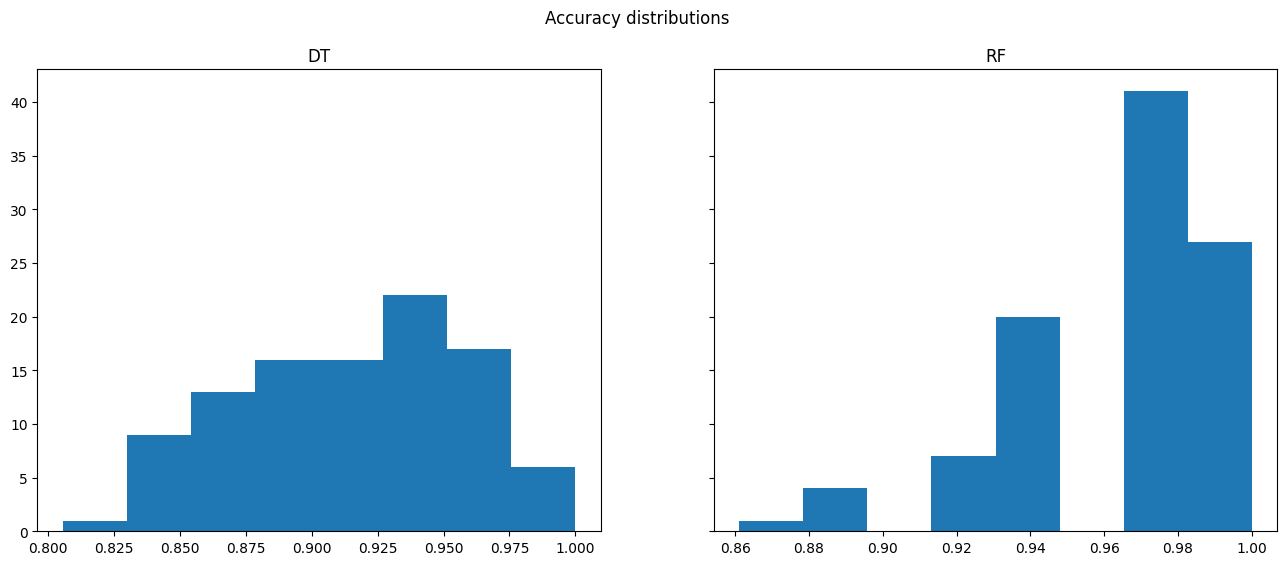

In [23]:
# Setting up figure with two sub-plots to show the distribution of the DT and RF results (accuracy)
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Accuracy distributions')

num_bins = 8

# Adding figure for DT
axs[0].hist(acc_list_dt, num_bins)
axs[0].set_title('DT')

# TODO: adding figure for RF
axs[1].hist(acc_list_rf, num_bins)
axs[1].set_title('RF')

### Testing for normality

**TODO:** Add normality testing for the RF

In [26]:
# Checking for normality and statistical significance
# Null hypothesis = data was drawn from a normal distribution
# If p-value < alpha --> reject null hypothesis

alpha = 0.05

print("DT normality tests")
stat, p = shapiro(acc_list_dt)
print(' - Shapiro:    W = %0.2f, p-value = %0.2f' % (stat, p))
if p < alpha:
    print("   - The distribution does NOT appear to be normal")
else:
    print("   - The appears to be normal")

stat, p = normaltest(acc_list_dt)
print(' - D’Agostino: W = %0.2f, p-value = %0.2f' % (stat, p))
if p < alpha:
    print("   - The distribution does NOT appear to be normal")
else:
    print("   - The appears to be normal")

# TODO: add normality tests for the RF

print("RF normality tests")
stat, p = shapiro(acc_list_rf)
print(' - Shapiro:    W = %0.2f, p-value = %0.2f' % (stat, p))
if p < alpha:
    print("   - The distribution does NOT appear to be normal")
else:
    print("   - The appears to be normal")

stat, p = normaltest(acc_list_rf)
print(' - D’Agostino: W = %0.2f, p-value = %0.2f' % (stat, p))
if p < alpha:
    print("   - The distribution does NOT appear to be normal")
else:
    print("   - The appears to be normal")


DT normality tests
 - Shapiro:    W = 0.94, p-value = 0.00
   - The distribution does NOT appear to be normal
 - D’Agostino: W = 10.42, p-value = 0.01
   - The distribution does NOT appear to be normal
RF normality tests
 - Shapiro:    W = 0.78, p-value = 0.00
   - The distribution does NOT appear to be normal
 - D’Agostino: W = 23.84, p-value = 0.00
   - The distribution does NOT appear to be normal


### Significance testing

In [28]:
# Null hypothesis = identical average scores
# If p-value < alpha --> reject null hypothesis

alpha = 0.05

stat, p = ttest_ind(acc_list_dt, acc_list_rf)
print('T-Test [for normal distributions]')
print(' - stat = %0.2f, p-value = %f' % (stat, p))
if p < alpha:
    print(" - The performance difference appears significant")
else:
    print(" - The performance difference is NOT significant")

# TODO: add Mann-Whitney U test for statistical significance


stat, p = mannwhitneyu(acc_list_dt, acc_list_rf)
print('Mann-Whitney U [for normal distributions]')
print(' - stat = %0.2f, p-value = %f' % (stat, p))
if p < alpha:
    print(" - The performance difference appears significant")
else:
    print(" - The performance difference is NOT significant")

T-Test [for normal distributions]
 - stat = -11.30, p-value = 0.000000
 - The performance difference appears significant
Mann-Whitney U [for normal distributions]
 - stat = 1344.00, p-value = 0.000000
 - The performance difference appears significant


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Conclusion

**TODO:** what's your conclusion? Whic model is best? Is the performance significantly "better" than the other?